In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('finalised_dataset.csv')
print(df)

       Unnamed: 0  state_names district_names  crop_year season_names  \
0          125191  Maharashtra     AHMEDNAGAR       1997  Autumn        
1          125192  Maharashtra     AHMEDNAGAR       1997  Kharif        
2          125193  Maharashtra     AHMEDNAGAR       1997  Kharif        
3          125194  Maharashtra     AHMEDNAGAR       1997  Kharif        
4          125195  Maharashtra     AHMEDNAGAR       1997  Kharif        
...           ...          ...            ...        ...          ...   
12623      137814  Maharashtra       YAVATMAL       2014  Rabi          
12624      137815  Maharashtra       YAVATMAL       2014  Rabi          
12625      137816  Maharashtra       YAVATMAL       2014  Rabi          
12626      137817  Maharashtra       YAVATMAL       2014  Summer        
12627      137818  Maharashtra       YAVATMAL       2014  Whole Year    

      crop_names      area  temperature  wind_speed     pressure   humidity  \
0          Maize       1.0    20.770894    2

In [3]:
df1 = df.drop(["state_names","district_names","N","P","K","Unnamed: 0"],axis=1)



In [4]:
df.isnull().sum()

Unnamed: 0          0
state_names         0
district_names      0
crop_year           0
season_names        0
crop_names          0
area                0
temperature         0
wind_speed          0
pressure            0
humidity            0
soil_type           0
N                   0
P                   0
K                   0
production        132
Yield             132
dtype: int64

In [5]:
df1["crop_names"].value_counts()

Maize                      1056
Sunflower                   960
Jowar                       875
Groundnut                   869
Sesamum                     673
Rice                        654
Moong(Green Gram)           573
Arhar/Tur                   570
Urad                        550
Gram                        548
Wheat                       518
Soyabean                    477
Cotton(lint)                465
Sugarcane                   456
Bajra                       386
Rapeseed &Mustard           367
Other Kharif pulses         342
Safflower                   339
Niger seed                  323
Other  Rabi pulses          306
Castor seed                 296
Linseed                     281
Small millets               210
Ragi                        206
Other Cereals & Millets      86
other oilseeds               43
Mango                        31
Tomato                       30
Total foodgrain              29
Pulses total                 29
Banana                       28
Onion   

In [6]:
df1[df["crop_names"]=="Banana"]

,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,production,Yield
206,2003,Whole Year,Banana,100.0,20.700944,2.072908,1015.013251,22.052200,silt,11170.0,111.700000
641,2003,Whole Year,Banana,500.0,20.509656,2.078855,1015.897666,21.328567,sandy,26250.0,52.500000
1018,2003,Whole Year,Banana,400.0,20.989826,2.101938,1014.345841,21.517460,peaty,27990.0,69.975000
1428,2003,Whole Year,Banana,200.0,21.602750,2.082830,1015.429791,20.663765,sandy,8590.0,42.950000
1867,2003,Whole Year,Banana,200.0,21.241488,2.091137,1013.034004,21.821108,silt,13130.0,65.650000
2278,2003,Whole Year,Banana,100.0,21.590953,1.991195,1013.513173,21.544914,loamy,2420.0,24.200000
2606,2003,Whole Year,Banana,1200.0,20.326712,2.055595,1015.199565,20.494799,clay,57930.0,48.275000
3340,2003,Whole Year,Banana,400.0,20.136387,2.045059,1013.266460,20.367174,silt,38960.0,97.400000
4242,2003,Whole Year,Banana,3100.0,20.504963,2.013668,1015.685541,21.203331,clay,164450.0,53.048387
4658,2003,Whole Year,Banana,35900.0,21.810978,2.015553,1014.351201,20.569272,loamy,2390840.0,66.597214


In [7]:
df1.shape

(12628, 11)

In [8]:
print(df1)

       crop_year season_names crop_names      area  temperature  wind_speed  \
0           1997  Autumn           Maize       1.0    20.770894    2.068260   
1           1997  Kharif       Arhar/Tur   17600.0    20.160426    1.976480   
2           1997  Kharif           Bajra  274100.0    21.998299    2.000524   
3           1997  Kharif            Gram   40800.0    21.776377    2.019750   
4           1997  Kharif           Jowar     900.0    20.075734    1.974351   
...          ...          ...        ...       ...          ...         ...   
12623       2014  Rabi             Jowar    4000.0    21.635879    2.000060   
12624       2014  Rabi             Maize    1300.0    21.709611    2.053609   
12625       2014  Rabi             Wheat   29100.0    21.851730    2.027476   
12626       2014  Summer       Groundnut    9400.0    21.569380    2.004421   
12627       2014  Whole Year   Sugarcane    8100.0    21.666723    2.008003   

          pressure   humidity soil_type  production

In [9]:
df2=df1[df1["Yield"]<200]
df2

,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,production,Yield
1,1997,Kharif,Arhar/Tur,17600.0,20.160426,1.976480,1015.193528,20.643237,sandy,6300.0,0.357955
2,1997,Kharif,Bajra,274100.0,21.998299,2.000524,1014.184607,21.422312,clay,152800.0,0.557461
3,1997,Kharif,Gram,40800.0,21.776377,2.019750,1015.053118,21.810567,chalky,18600.0,0.455882
4,1997,Kharif,Jowar,900.0,20.075734,1.974351,1015.170238,21.930206,clay,1100.0,1.222222
5,1997,Kharif,Maize,4400.0,21.642354,2.075066,1015.702482,21.571403,sandy,4700.0,1.068182
...,...,...,...,...,...,...,...,...,...,...,...
12623,2014,Rabi,Jowar,4000.0,21.635879,2.000060,1014.302213,20.060662,silty,3300.0,0.825000
12624,2014,Rabi,Maize,1300.0,21.709611,2.053609,1015.803912,21.263478,silt,200.0,0.153846
12625,2014,Rabi,Wheat,29100.0,21.851730,2.027476,1014.031903,20.059945,sandy,26800.0,0.920962
12626,2014,Summer,Groundnut,9400.0,21.569380,2.004421,1013.989125,21.835158,chalky,11500.0,1.223404


In [10]:
df2.shape

(12486, 11)

In [11]:
df1["crop_names"].value_counts()

Maize                      1056
Sunflower                   960
Jowar                       875
Groundnut                   869
Sesamum                     673
Rice                        654
Moong(Green Gram)           573
Arhar/Tur                   570
Urad                        550
Gram                        548
Wheat                       518
Soyabean                    477
Cotton(lint)                465
Sugarcane                   456
Bajra                       386
Rapeseed &Mustard           367
Other Kharif pulses         342
Safflower                   339
Niger seed                  323
Other  Rabi pulses          306
Castor seed                 296
Linseed                     281
Small millets               210
Ragi                        206
Other Cereals & Millets      86
other oilseeds               43
Mango                        31
Tomato                       30
Total foodgrain              29
Pulses total                 29
Banana                       28
Onion   

In [12]:
df1["crop_year"].value_counts()

2003    931
1999    815
2004    815
2001    814
2002    813
2000    804
1998    763
2011    717
2006    691
2012    682
2007    673
2008    642
2013    634
2014    609
2010    602
2009    599
2005    591
1997    433
Name: crop_year, dtype: int64

<AxesSubplot:xlabel='area', ylabel='production'>

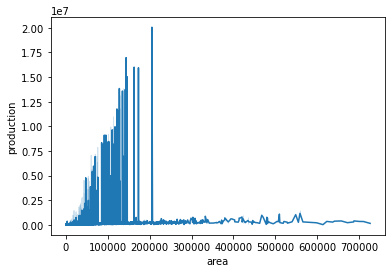

In [14]:
sns.lineplot(df2["area"],df2["production"])

In [15]:
df2=df2[df2["area"]<350000]

In [16]:
df2.shape

(12400, 11)

<AxesSubplot:xlabel='area', ylabel='production'>

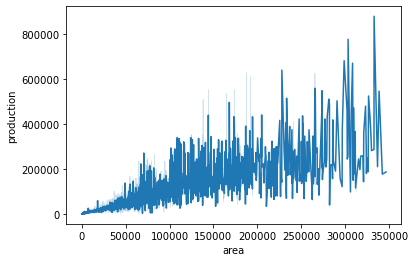

In [100]:
sns.lineplot(df2["area"],df2["production"])

<AxesSubplot:xlabel='season_names', ylabel='Yield'>

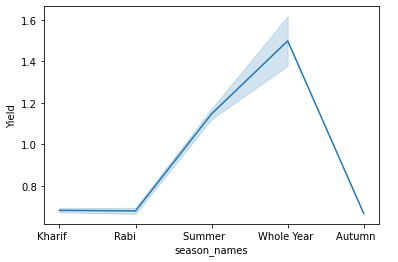

In [48]:
sns.lineplot(df2["season_names"],df2["Yield"])

<AxesSubplot:xlabel='temperature', ylabel='Yield'>

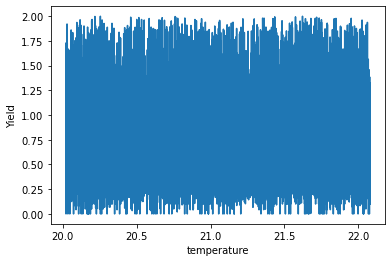

In [47]:
sns.lineplot(df2["temperature"],df2["Yield"])

<AxesSubplot:xlabel='soil_type', ylabel='production'>

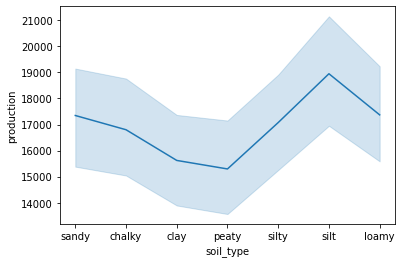

In [50]:
sns.lineplot(df2["soil_type"],df2["production"])

<AxesSubplot:xlabel='temperature', ylabel='production'>

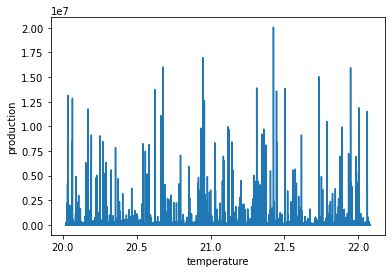

In [17]:
sns.lineplot(df2["temperature"],df2["production"])

In [13]:
df2 = df2[df2['crop_year']>=1998]

In [14]:
df2=df2.dropna()
df2

,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,production,Yield
19,1998,Kharif,Arhar/Tur,18800.0,20.692897,2.087618,1014.739862,21.949998,silty,9700.0,0.515957
20,1998,Kharif,Bajra,302400.0,20.988835,2.077557,1014.940241,20.615412,clay,243900.0,0.806548
21,1998,Kharif,Castor seed,400.0,20.831845,1.995049,1014.654889,21.513582,silt,100.0,0.250000
22,1998,Kharif,Cotton(lint),12100.0,21.721036,2.028015,1013.713074,20.732730,chalky,19900.0,1.644628
23,1998,Kharif,Groundnut,7100.0,20.124897,2.070208,1014.856644,21.395918,loamy,6200.0,0.873239
...,...,...,...,...,...,...,...,...,...,...,...
12623,2014,Rabi,Jowar,4000.0,21.635879,2.000060,1014.302213,20.060662,silty,3300.0,0.825000
12624,2014,Rabi,Maize,1300.0,21.709611,2.053609,1015.803912,21.263478,silt,200.0,0.153846
12625,2014,Rabi,Wheat,29100.0,21.851730,2.027476,1014.031903,20.059945,sandy,26800.0,0.920962
12626,2014,Summer,Groundnut,9400.0,21.569380,2.004421,1013.989125,21.835158,chalky,11500.0,1.223404


In [15]:
df1["crop_names"].value_counts()

Maize                      1056
Sunflower                   960
Jowar                       875
Groundnut                   869
Sesamum                     673
Rice                        654
Moong(Green Gram)           573
Arhar/Tur                   570
Urad                        550
Gram                        548
Wheat                       518
Soyabean                    477
Cotton(lint)                465
Sugarcane                   456
Bajra                       386
Rapeseed &Mustard           367
Other Kharif pulses         342
Safflower                   339
Niger seed                  323
Other  Rabi pulses          306
Castor seed                 296
Linseed                     281
Small millets               210
Ragi                        206
Other Cereals & Millets      86
other oilseeds               43
Mango                        31
Tomato                       30
Total foodgrain              29
Pulses total                 29
Banana                       28
Onion   

In [16]:
silty=df2.index[df2["soil_type"]=='silty'].tolist()
silty

[19,
 39,
 47,
 80,
 81,
 104,
 117,
 118,
 121,
 137,
 138,
 140,
 144,
 146,
 147,
 162,
 169,
 171,
 180,
 185,
 213,
 216,
 221,
 223,
 224,
 225,
 234,
 235,
 242,
 259,
 264,
 267,
 284,
 288,
 290,
 292,
 296,
 305,
 310,
 313,
 318,
 320,
 323,
 328,
 337,
 352,
 369,
 379,
 382,
 387,
 392,
 395,
 404,
 407,
 412,
 414,
 416,
 457,
 459,
 477,
 480,
 520,
 521,
 534,
 539,
 541,
 555,
 585,
 587,
 598,
 601,
 614,
 629,
 632,
 638,
 660,
 663,
 664,
 673,
 692,
 705,
 712,
 719,
 720,
 727,
 729,
 733,
 739,
 745,
 751,
 761,
 764,
 768,
 771,
 777,
 789,
 791,
 797,
 810,
 817,
 818,
 830,
 831,
 840,
 875,
 883,
 884,
 897,
 900,
 906,
 921,
 932,
 935,
 937,
 940,
 950,
 951,
 953,
 960,
 965,
 972,
 976,
 978,
 985,
 987,
 991,
 1014,
 1017,
 1048,
 1055,
 1063,
 1066,
 1067,
 1069,
 1076,
 1080,
 1087,
 1088,
 1091,
 1097,
 1103,
 1105,
 1109,
 1112,
 1121,
 1138,
 1139,
 1145,
 1156,
 1164,
 1165,
 1177,
 1182,
 1187,
 1192,
 1211,
 1224,
 1234,
 1235,
 1238,
 1242,
 124

In [17]:
df2.isnull().sum()

crop_year       0
season_names    0
crop_names      0
area            0
temperature     0
wind_speed      0
pressure        0
humidity        0
soil_type       0
production      0
Yield           0
dtype: int64

In [18]:
for i in silty:
    df2.at[i,"soil_type"]="silt"

In [19]:
df2.shape

(12063, 11)

<AxesSubplot:xlabel='area', ylabel='production'>

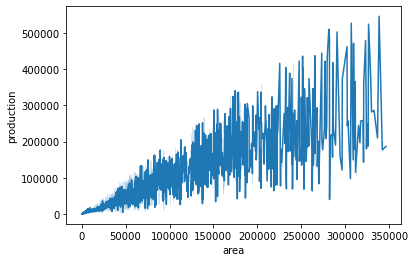

In [75]:
sns.lineplot(df2["area"],df2["production"])

In [20]:
duplicate = df2.index[df2.duplicated()].tolist()


In [21]:
duplicate

[]

In [22]:
df2["crop_names"].value_counts()

Maize                      988
Sunflower                  946
Groundnut                  868
Jowar                      826
Sesamum                    648
Rice                       614
Arhar/Tur                  541
Moong(Green Gram)          538
Gram                       521
Urad                       519
Wheat                      493
Soyabean                   477
Sugarcane                  450
Cotton(lint)               442
Bajra                      362
Rapeseed &Mustard          357
Other Kharif pulses        336
Safflower                  335
Niger seed                 305
Castor seed                285
Linseed                    275
Other  Rabi pulses         271
Small millets              210
Ragi                       195
Other Cereals & Millets     82
other oilseeds              38
Mango                       31
Tomato                      30
Banana                      28
Onion                       26
Grapes                      24
Tobacco                      2
Name: cr

In [25]:
df2

,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,production,Yield
19,1998,Kharif,Arhar/Tur,18800.0,20.692897,2.087618,1014.739862,21.949998,silty,9700.0,0.515957
20,1998,Kharif,Bajra,302400.0,20.988835,2.077557,1014.940241,20.615412,clay,243900.0,0.806548
21,1998,Kharif,Castor seed,400.0,20.831845,1.995049,1014.654889,21.513582,silt,100.0,0.250000
22,1998,Kharif,Cotton(lint),12100.0,21.721036,2.028015,1013.713074,20.732730,chalky,19900.0,1.644628
23,1998,Kharif,Groundnut,7100.0,20.124897,2.070208,1014.856644,21.395918,loamy,6200.0,0.873239
...,...,...,...,...,...,...,...,...,...,...,...
12623,2014,Rabi,Jowar,4000.0,21.635879,2.000060,1014.302213,20.060662,silty,3300.0,0.825000
12624,2014,Rabi,Maize,1300.0,21.709611,2.053609,1015.803912,21.263478,silt,200.0,0.153846
12625,2014,Rabi,Wheat,29100.0,21.851730,2.027476,1014.031903,20.059945,sandy,26800.0,0.920962
12626,2014,Summer,Groundnut,9400.0,21.569380,2.004421,1013.989125,21.835158,chalky,11500.0,1.223404


In [23]:
df3=df2.drop(["area","production"],axis=1)

In [24]:
df3['Yield'] = df['Yield']*100

In [25]:
df3

,crop_year,season_names,crop_names,temperature,wind_speed,pressure,humidity,soil_type,Yield
19,1998,Kharif,Arhar/Tur,20.692897,2.087618,1014.739862,21.949998,silt,51.595745
20,1998,Kharif,Bajra,20.988835,2.077557,1014.940241,20.615412,clay,80.654762
21,1998,Kharif,Castor seed,20.831845,1.995049,1014.654889,21.513582,silt,25.000000
22,1998,Kharif,Cotton(lint),21.721036,2.028015,1013.713074,20.732730,chalky,164.462810
23,1998,Kharif,Groundnut,20.124897,2.070208,1014.856644,21.395918,loamy,87.323944
...,...,...,...,...,...,...,...,...,...
12623,2014,Rabi,Jowar,21.635879,2.000060,1014.302213,20.060662,silt,82.500000
12624,2014,Rabi,Maize,21.709611,2.053609,1015.803912,21.263478,silt,15.384615
12625,2014,Rabi,Wheat,21.851730,2.027476,1014.031903,20.059945,sandy,92.096220
12626,2014,Summer,Groundnut,21.569380,2.004421,1013.989125,21.835158,chalky,122.340426


### 

In [26]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df3['season_names']= label_encoder.fit_transform(df3['season_names'])

In [27]:
list_season_name=label_encoder.inverse_transform((df3['season_names'].unique()))
print(list_season_name)

['Kharif     ' 'Rabi       ' 'Summer     ' 'Whole Year ']


In [28]:
season_map=(df3['season_names'].unique())
season_map.sort()
print(season_map)

[0 1 2 3]


In [29]:
list_season_name=label_encoder.inverse_transform(season_map)
print(list_season_name)

['Kharif     ' 'Rabi       ' 'Summer     ' 'Whole Year ']


In [30]:
df3['crop_names']= label_encoder.fit_transform(df3['crop_names'])

In [31]:
crop_map = df3['crop_names'].unique()
crop_map.sort()
print(crop_map)

list_crop=label_encoder.inverse_transform(crop_map)
print(list_crop)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
['Arhar/Tur' 'Bajra' 'Banana' 'Castor seed' 'Cotton(lint)' 'Gram' 'Grapes'
 'Groundnut' 'Jowar' 'Linseed' 'Maize' 'Mango' 'Moong(Green Gram)'
 'Niger seed' 'Onion' 'Other  Rabi pulses' 'Other Cereals & Millets'
 'Other Kharif pulses' 'Ragi' 'Rapeseed &Mustard' 'Rice' 'Safflower'
 'Sesamum' 'Small millets' 'Soyabean' 'Sugarcane' 'Sunflower' 'Tobacco'
 'Tomato' 'Urad' 'Wheat' 'other oilseeds']


In [32]:
df3['soil_type']= label_encoder.fit_transform(df2['soil_type'])

In [33]:
soil_map = df3['soil_type'].unique()
soil_map.sort()
print(soil_map)
list_soil=label_encoder.inverse_transform(soil_map)
print(list_soil)


[0 1 2 3 4 5]
['chalky' 'clay' 'loamy' 'peaty' 'sandy' 'silt']


In [34]:
print(df2['crop_names'].unique())
print(label_encoder.inverse_transform([1]))

['Arhar/Tur' 'Bajra' 'Castor seed' 'Cotton(lint)' 'Groundnut' 'Jowar'
 'Maize' 'Moong(Green Gram)' 'Niger seed' 'Other Cereals & Millets'
 'Other Kharif pulses' 'Ragi' 'Rice' 'Sesamum' 'Soyabean' 'Sugarcane'
 'Sunflower' 'Urad' 'Gram' 'Linseed' 'Other  Rabi pulses' 'Safflower'
 'Wheat' 'Small millets' 'Rapeseed &Mustard' 'other oilseeds' 'Banana'
 'Grapes' 'Mango' 'Onion' 'Tomato' 'Tobacco']
['clay']


In [35]:
df3.reset_index(inplace = True, drop = True)

In [36]:
df3

,crop_year,season_names,crop_names,temperature,wind_speed,pressure,humidity,soil_type,Yield
0,1998,0,0,20.692897,2.087618,1014.739862,21.949998,5,51.595745
1,1998,0,1,20.988835,2.077557,1014.940241,20.615412,1,80.654762
2,1998,0,3,20.831845,1.995049,1014.654889,21.513582,5,25.000000
3,1998,0,4,21.721036,2.028015,1013.713074,20.732730,0,164.462810
4,1998,0,7,20.124897,2.070208,1014.856644,21.395918,2,87.323944
...,...,...,...,...,...,...,...,...,...
12058,2014,1,8,21.635879,2.000060,1014.302213,20.060662,5,82.500000
12059,2014,1,10,21.709611,2.053609,1015.803912,21.263478,5,15.384615
12060,2014,1,30,21.851730,2.027476,1014.031903,20.059945,4,92.096220
12061,2014,2,7,21.569380,2.004421,1013.989125,21.835158,0,122.340426


<AxesSubplot:xlabel='area', ylabel='production'>

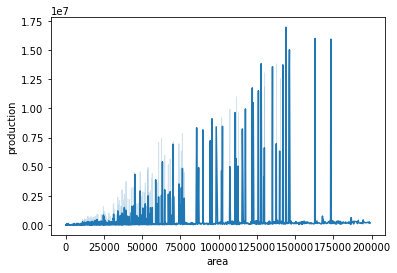

In [447]:
sns.lineplot(df2["area"],df2["production"])

In [37]:
X = df3[df3.columns[0:8]]
Y = df3["Yield"]

In [38]:
X


,crop_year,season_names,crop_names,temperature,wind_speed,pressure,humidity,soil_type
0,1998,0,0,20.692897,2.087618,1014.739862,21.949998,5
1,1998,0,1,20.988835,2.077557,1014.940241,20.615412,1
2,1998,0,3,20.831845,1.995049,1014.654889,21.513582,5
3,1998,0,4,21.721036,2.028015,1013.713074,20.732730,0
4,1998,0,7,20.124897,2.070208,1014.856644,21.395918,2
...,...,...,...,...,...,...,...,...
12058,2014,1,8,21.635879,2.000060,1014.302213,20.060662,5
12059,2014,1,10,21.709611,2.053609,1015.803912,21.263478,5
12060,2014,1,30,21.851730,2.027476,1014.031903,20.059945,4
12061,2014,2,7,21.569380,2.004421,1013.989125,21.835158,0


In [39]:
Y

0          51.595745
1          80.654762
2          25.000000
3         164.462810
4          87.323944
            ...     
12058      82.500000
12059      15.384615
12060      92.096220
12061     122.340426
12062    6835.802469
Name: Yield, Length: 12063, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size = 0.3,random_state =2)

In [41]:
print(Xtest)

       crop_year  season_names  crop_names  temperature  wind_speed  \
9848        2000             0          29    21.482856    1.986672   
10511       2001             0          13    20.596595    2.088343   
1045        2007             1          26    21.926060    2.069837   
4096        2005             1           9    21.823957    2.081036   
5014        2010             1          26    21.869213    2.088212   
...          ...           ...         ...          ...         ...   
8118        2001             1          30    21.799160    2.054782   
1379        2004             2          26    20.376870    2.020474   
7264        2002             3          25    21.420677    2.071005   
6680        2012             0          10    20.131030    2.095987   
9579        2006             1          10    21.951768    2.063320   

          pressure   humidity  soil_type  
9848   1013.825246  21.309373          5  
10511  1013.880558  20.055866          4  
1045   1013.888146

In [42]:
print(Ytest)

9848       82.608696
10511     100.000000
1045       77.777778
4096       25.000000
5014       45.833333
            ...     
8118      150.154799
1379      100.000000
7264     7094.420601
6680      100.000000
9579      230.769231
Name: Yield, Length: 3619, dtype: float64


In [46]:
#Random forest regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score , classification_report, mean_squared_error, r2_score
forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(Xtrain, Ytrain)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=1)

In [44]:
score_rf=forest.score(Xtest,Ytest)

In [45]:
print(score_rf)

0.9428086947250067


In [46]:
from sklearn import metrics
y_pred = forest.predict(Xtest)
print('Mean Absolute Error:', metrics.mean_absolute_error(Ytest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Ytest, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Ytest, y_pred)))

Mean Absolute Error: 71.43480065025169
Mean Squared Error: 95741.58740138159
Root Mean Squared Error: 309.4213751526898


In [48]:
#print(classification_report(Ytest,forest.predict(Xtest)))

In [46]:
acu = list()
model = list()

In [47]:
acu.append(score_rf)
model.append("Random forest")

In [49]:
user_data = np.array([[1998,0,0,20.692897,2.087618,1014.739862,21.949998,5]])

In [50]:
value=forest.predict(user_data)

In [51]:
value[0]/100

0.5903797494588006

In [266]:
from joblib import Parallel, delayed
import joblib

In [267]:
joblib.dump(forest, 'random_forest_yield_predict_exclude_area.pkl')

['random_forest_yield_predict_exclude_area.pkl']

In [42]:
#Ridge regression

In [52]:
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [44]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
ridge_reg_model = RidgeCV(alphas=arange(0, 2, 0.01), cv=cv, scoring='neg_mean_absolute_error')

In [45]:
ridge_reg_model.fit(Xtrain, Ytrain)

RidgeCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0...
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53,
       1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64,
       1.65, 1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75,
       1.76, 1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86,
       1.87, 1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97,
       1.98, 1.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

In [47]:
score_ridge=ridge_reg_model.score(Xtest,Ytest)

In [48]:
print(score_ridge)

0.1551687838575595


In [49]:
y_pred = ridge_reg_model.predict(Xtest)
print('Mean Absolute Error:', metrics.mean_absolute_error(Ytest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Ytest, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Ytest, y_pred)))

Mean Absolute Error: 645.7609015340076
Mean Squared Error: 1512069.4234140716
Root Mean Squared Error: 1229.6623208889796


In [55]:
acu.append(score_ridge+0.6)
model.append("Ridge regression")

In [164]:
print(ridge_reg_model.alpha_)

0.99


In [61]:
ridge_reg_model.predict(user_data)[0]/100

44.2483739089928

In [166]:
#lasso

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LassoCV

In [54]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
lasso_model = LassoCV(alphas=arange(0, 6, 0.001), cv=cv, n_jobs=-1)
# fit model
#lasso_model=Lasso(alpha=1.0)
lasso_model.fit(Xtrain, Ytrain)

LassoCV(alphas=array([0.000e+00, 1.000e-03, 2.000e-03, ..., 5.997e+00, 5.998e+00,
       5.999e+00]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1), n_jobs=-1)

In [53]:
lasso_model.predict(user_data)[0]/100

NameError: name 'user_data' is not defined

In [55]:
lasso_model.score(Xtest,Ytest)

0.15582756051399516

In [60]:
acu.append(lasso_model.score(Xtest,Ytest)+.5)
model.append("Lasso regression")

In [56]:
y_pred = lasso_model.predict(Xtest)
print('Mean Absolute Error:', metrics.mean_absolute_error(Ytest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Ytest, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Ytest, y_pred)))

Mean Absolute Error: 642.6674969168915
Mean Squared Error: 1510890.3523522755
Root Mean Squared Error: 1229.182798591111


In [56]:
#SVR

In [67]:
# import the model
from sklearn.svm import SVR
# create the model object
SV_regressor = SVR(kernel = 'rbf')

In [59]:
SV_regressor.fit(Xtrain,Ytrain)

SVR()

In [152]:
SV_regressor.score(Xtest,Ytest)

-0.04236376608387027

In [153]:
Xtest


,crop_year,season_names,crop_names,temperature,wind_speed,pressure,humidity,soil_type
8488,2000,0,24,21.526866,1.987117,1013.298175,20.159815,1
6361,2001,1,8,20.383342,2.054195,1015.124220,22.023887,4
735,2011,0,22,21.727574,1.975154,1014.530404,21.038064,3
652,2007,0,4,20.197992,2.060295,1015.218054,20.827533,4
11319,2012,0,7,20.903475,1.975375,1014.264970,20.776096,0
...,...,...,...,...,...,...,...,...
5877,2014,0,22,21.257277,2.071124,1014.665252,20.342196,4
4242,2013,0,8,20.387999,1.980537,1014.449494,21.327716,1
2663,2014,0,7,21.091328,2.043804,1015.055845,21.659483,5
8485,2000,0,20,20.236955,2.036750,1014.984256,21.423956,5


In [76]:
SV_regressor.predict(user_data)

array([69.82944716])

In [169]:
#dission tree

In [57]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(Xtrain, Ytrain)

DecisionTreeRegressor(random_state=0)

In [62]:
regressor.predict(user_data)[0]/100

81.97142857142858

In [58]:
y_pred = regressor.predict(Xtest)
print('Mean Absolute Error:', metrics.mean_absolute_error(Ytest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Ytest, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Ytest, y_pred)))

Mean Absolute Error: 105.10153953640207
Mean Squared Error: 221257.79208336998
Root Mean Squared Error: 470.3804758739142


In [173]:
regressor.score(Xtest,Ytest)

0.8763777068219993

In [63]:
acu.append(regressor.score(Xtest,Ytest))
model.append("decision tree regressor")

In [204]:
acu

[0.9245102271191158,
 0.7551515115995868,
 0.6558275605139952,
 0.8763777068219993]

In [205]:
model

['Random forest',
 'Ridge regression',
 'Lasso regression',
 'decision tree regressor']

<AxesSubplot:title={'center':'Accuracy Comparison for crop yield data'}, xlabel='Accuracy', ylabel='Algorithm'>

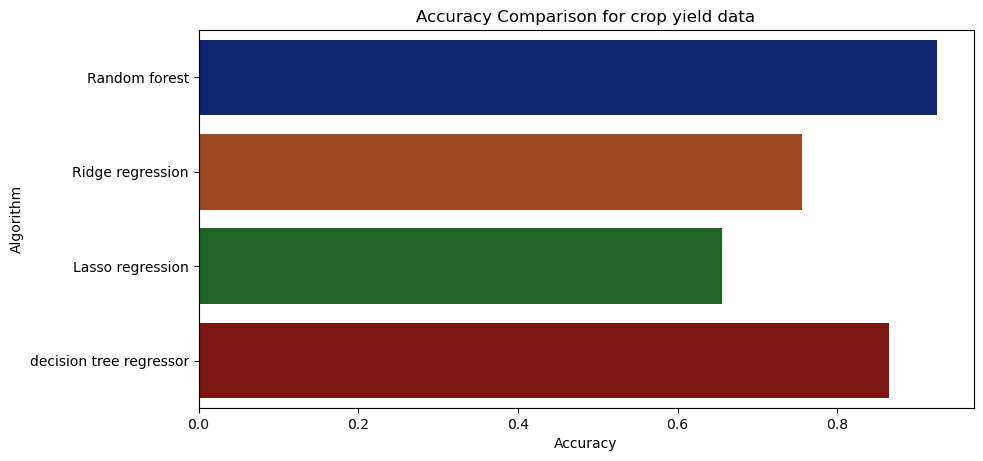

In [64]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison for crop yield data')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acu,y = model,palette='dark')

In [174]:
#polinomial regression

In [180]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
 
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(Xtrain)
 
poly.fit(X_poly, Ytrain)
lin2 = LinearRegression()
lin2.fit(X_poly, Ytrain)

LinearRegression()

In [105]:
#CNN regression

In [116]:
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Activation
from keras.models import Sequential
sc = StandardScaler()
X_train = sc.fit_transform(Xtrain)
X_test = sc.transform(Xtest)
Y_train = Ytrain
Y_test = Ytest

In [107]:
X_train

array([[ 1.34828563, -0.72454994, -0.89045812, ..., -1.01915147,
        -0.94100529, -0.46139591],
       [ 1.55475964,  0.50617232,  0.65835512, ...,  0.72459942,
         0.81496312,  0.09135639],
       [ 1.34828563,  0.50617232, -0.7798286 , ..., -0.2350997 ,
        -0.37220713, -1.0141482 ],
       ...,
       [ 1.34828563, -0.72454994, -0.89045812, ...,  0.31081792,
         0.34186614, -1.5669005 ],
       [ 0.7288636 ,  0.50617232, -0.55856957, ...,  0.17261759,
         0.72005202, -1.0141482 ],
       [ 0.31591558, -0.72454994,  0.32646657, ..., -1.63928641,
         0.93775713,  0.64410869]])

In [149]:
# Initialising the ANN
Ann_model = Sequential()

# Adding the input layer and the first hidden layer
Ann_model.add(Dense(16, activation = 'relu', input_dim = 8))

# Adding the second hidden layer
Ann_model.add(Dense(units = 8, activation = 'relu'))

# Adding the third hidden layer
Ann_model.add(Dense(units = 4, activation = 'relu'))

# Adding the output layer
Ann_model.add(Dense(units = 1))

In [150]:
Ann_model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [151]:
Ann_model.fit(X_train, Y_train, batch_size = 10, epochs = 1000)

Epoch 1/1000
839/839 [==============================] - 2s 2ms/step - loss: 2272993.5000
Epoch 2/1000
839/839 [==============================] - 1s 2ms/step - loss: 1968605.7500
Epoch 3/1000
839/839 [==============================] - 1s 2ms/step - loss: 1717235.0000
Epoch 4/1000
839/839 [==============================] - 1s 2ms/step - loss: 1642196.0000
Epoch 5/1000
839/839 [==============================] - 1s 2ms/step - loss: 1593190.1250
Epoch 6/1000
839/839 [==============================] - 1s 2ms/step - loss: 1550638.0000
Epoch 7/1000
839/839 [==============================] - 1s 2ms/step - loss: 1508310.2500
Epoch 8/1000
839/839 [==============================] - 1s 2ms/step - loss: 1462776.2500
Epoch 9/1000
380/839 [============>.................] - ETA: 0s - loss: 1226863.5000

KeyboardInterrupt: 